In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import seaborn as sns
from datetime import datetime
import plotly.express as px
import numpy as np

In [6]:
df = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\arquivoparaprojeto.csv")

In [7]:
df.head(10)

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
5,6,Sandra Cox,gparks@example.org,gparks,1954-09-19,Female,Lake Johnathan,2024-01-15,2025-01-14,Monthly,Amex,Manual,Occasional,Books,Action,Tablet,Low,3.8,2
6,7,Benjamin Marshall,michaellewis@example.net,michaellewis,2003-02-09,Male,Carlsonchester,2024-04-08,2025-04-08,Monthly,Amex,Auto-renew,Frequent,Clothing,Sci-Fi,Tablet,Medium,4.4,10
7,8,James Smith,adrienne49@example.org,adrienne49,1946-10-04,Male,West Matthewborough,2024-02-16,2025-02-15,Monthly,Visa,Manual,Regular,Electronics,Horror,Smart TV,Medium,3.6,6
8,9,Bradley Green,brittany02@example.net,brittany02,1950-12-24,Female,Karenshire,2024-04-09,2025-04-09,Annual,Amex,Manual,Frequent,Electronics,Documentary,Smartphone,Medium,4.0,8
9,10,Kayla Hernandez,jessica53@example.net,jessica53,1963-06-16,Male,West Stephen,2024-03-10,2025-03-10,Monthly,Visa,Auto-renew,Frequent,Clothing,Drama,Tablet,High,4.9,6


In [8]:
df.shape 

(2500, 19)

In [9]:
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64


In [10]:
nulos_por_linhas = df.isnull().sum(axis=1)  
print(nulos_por_linhas)

0       0
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Length: 2500, dtype: int64


In [11]:
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [12]:
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [13]:
df = df.drop_duplicates()

In [14]:
def visualizar_as_duplicadas(df):  
    duplicados = df[df.duplicated(keep=False)]

    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print (linhas_duplicadas)

Empty DataFrame
Columns: [User ID, Name, Email Address, Username, Date of Birth, Gender, Location, Membership Start Date, Membership End Date, Subscription Plan, Payment Information, Renewal Status, Usage Frequency, Purchase History, Favorite Genres, Devices Used, Engagement Metrics, Feedback/Ratings, Customer Support Interactions]
Index: []


In [15]:
df.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')

In [16]:
df = df.drop(columns=["Engagement Metrics"])  #apagar colunas do df

In [17]:
df.rename(columns={              
    'User ID': 'ID Cliente',
    'Name':'Nome', 
    'Email Address':'Email', 
    'Username': 'Usuario', 
    'Date of Birth':'Data de aniversario',
    'Gender':'Genero', 
    'Location':'Localização', 
    'Membership Start Date':'Inicio da associação', 
    'Membership End Date':'Fim da associação',
    'Subscription Plan':'Plano de assinatura', 
    'Payment Information':'Informações de pagamento', 
    'Renewal Status':'Status de renovação',
    'Usage Frequency':'Frequencia de uso', 
    'Purchase History':'Historico de compras', 
    'Favorite Genres':'Genero favorito',
    'Devices Used':'Dispositivos usados',  
    'Feedback/Ratings':'Feedbacks/Classificações',
    'Customer Support Interactions':'Interações de suporte ao cliente'
}, inplace=True)

In [18]:
df.columns

Index(['ID Cliente', 'Nome', 'Email', 'Usuario', 'Data de aniversario',
       'Genero', 'Localização', 'Inicio da associação', 'Fim da associação',
       'Plano de assinatura', 'Informações de pagamento',
       'Status de renovação', 'Frequencia de uso', 'Historico de compras',
       'Genero favorito', 'Dispositivos usados', 'Feedbacks/Classificações',
       'Interações de suporte ao cliente'],
      dtype='object')

In [19]:
df.to_csv("amazonprime_tratado.csv",index=False)  #salvei um novo dataframe

In [20]:
df.head(3)

,ID Cliente,Nome,Email,Usuario,Data de aniversario,Genero,Localização,Inicio da associação,Fim da associação,Plano de assinatura,Informações de pagamento,Status de renovação,Frequencia de uso,Historico de compras,Genero favorito,Dispositivos usados,Feedbacks/Classificações,Interações de suporte ao cliente
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,3.3,8


In [ ]:
#Qual a divisão de usuários por gênero no streaming?
#Qual o gênero favorito entre os usuários?
#Qual a divisão de gênero favorito por sexagem e comparação entre eles?
#Qual a distribuição de usuários por idade?

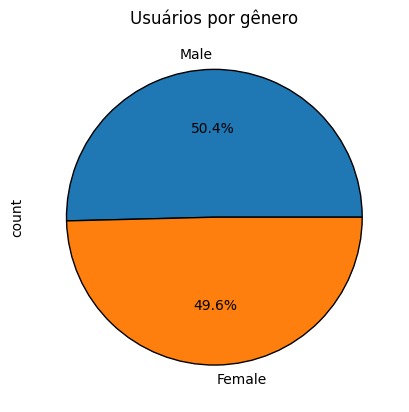

In [21]:
#Qual a divisão de usuários por gênero no streaming?

#contagem de usuários
contagem_genero = df["Genero"].value_counts()
#criação do grafico
contagem_genero.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e'],
    wedgeprops={'edgecolor': 'black'},
    title='Usuários por gênero'
)
plt.show()

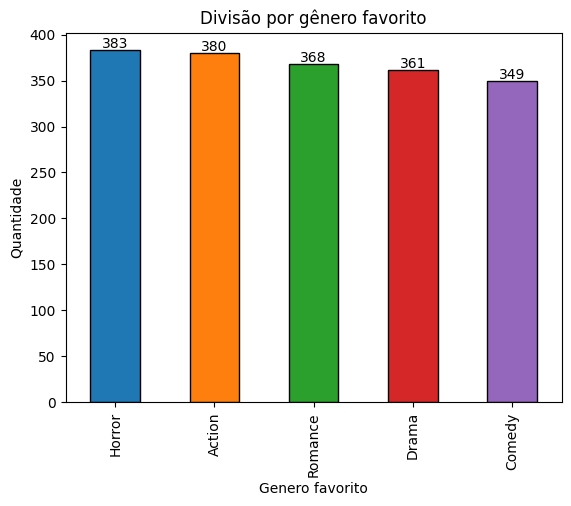

In [22]:
#Qual o genero favorito entre os usuários?

#contagem do tipo de generos
genero_favorito = df["Genero favorito"].value_counts().nlargest(5) #nlargest é usado para selecionar as n maiores entradas de uma Series ou de uma coluna específica de um DataFrame.
#criação do grafico
genero_favorito.plot(kind="bar", edgecolor="black", color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for index, value in enumerate(genero_favorito):
    plt.text(index, value + 2.5, str(value), ha='center')

#configurações
plt.xlabel("Genero favorito")
plt.ylabel("Quantidade")
plt.title("Divisão por gênero favorito")
plt.show()

In [23]:
#Qual a divisão de gênero favorito por sexagem e comparação entre eles?

nota_feminina = df[df['Genero'] == 'Female']['Genero favorito'].value_counts().reset_index() 
nota_masculina = df[df['Genero'] =='Male']['Genero favorito'].value_counts().reset_index() 

print(nota_masculina)

  Genero favorito  count
0          Horror    203
1         Romance    193
2          Action    182
3     Documentary    175
4           Drama    175
5          Comedy    167
6          Sci-Fi    165


In [24]:
nota_feminina = df[df['Genero'] == 'Female']['Genero favorito'].value_counts().reset_index() 
nota_masculina = df[df['Genero'] =='Male']['Genero favorito'].value_counts().reset_index() 

print(nota_feminina)

  Genero favorito  count
0          Action    198
1           Drama    186
2          Comedy    182
3          Horror    180
4         Romance    175
5     Documentary    165
6          Sci-Fi    154


In [41]:
fig = px.histogram(df, x ='Genero favorito', 
                   color='Genero',
                   barmode='group')

counts = df.groupby(['Genero favorito', 'Genero']).size().reset_index(name='Count')


fig.update_layout(                                   # função é usada para atualizar o layout de um gráfico Plotly
    title='Categoria por Genero',
    xaxis_title='Genero favorito',
    yaxis_title='Total',
    font={'color':'Black', 'size':12,'family':'Courrier New'}
    )
fig.show()

In [26]:
#Qual a distribuição de usuários por idade?

df['Data de aniversario'] = pd.to_datetime(df['Data de aniversario'])    #converte para o tipo da dados datetime
df['Idade'] = 2024 - df['Data de aniversario'].dt.year

df[['Data de aniversario', 'Idade']].head()

,Data de aniversario,Idade
0,1953-06-03,71
1,1978-07-08,46
2,1994-12-06,30
3,1964-12-22,60
4,1961-06-04,63


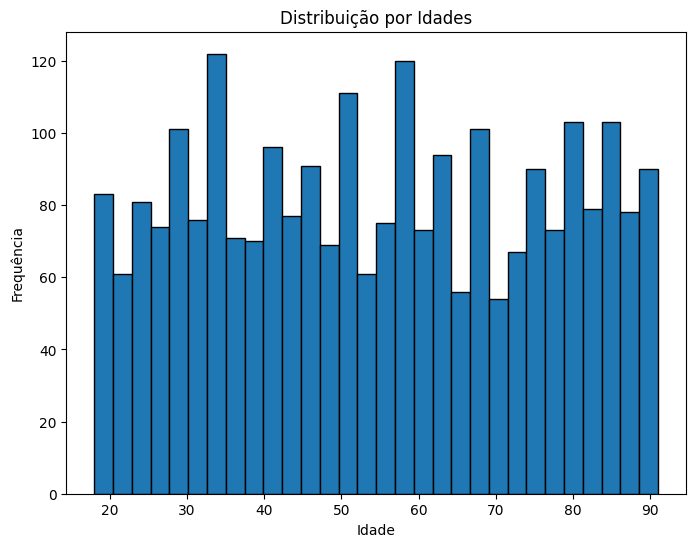

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['Idade'], bins=30, edgecolor='black') 
plt.title('Distribuição por Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Teste de relação sexo feminino e feedbacks com notas altas     

Hipotese Nula HO: A média das notas dadas por mulheres é MAIOR ou igual à média das notas dadas por homens.
Hipotese Alternativa H1:  A média das notas dadas por mulheres é MENOR que a média das notas dadas por homens.

Teste T de notas por gênero
Estatística T : -0.3238265665060981
Valor P: 0.7460964509207242


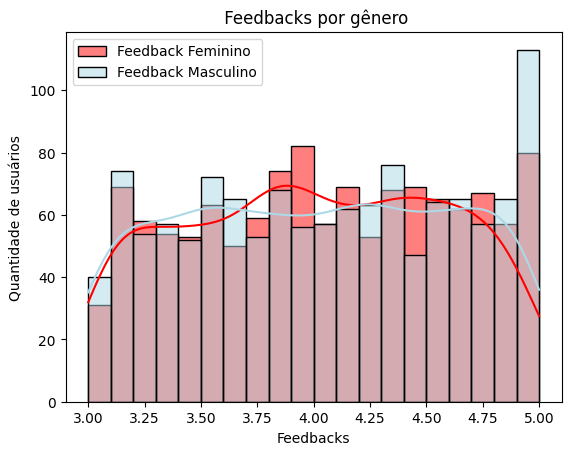

Não rejeitamos a hipótese nula


In [29]:
#Amostragem

nota_feminina = df[df['Genero'] == 'Female']['Feedbacks/Classificações']
nota_masculina = df[df['Genero'] =='Male']['Feedbacks/Classificações']

# Teste t
estatistica_t, valor_p = ttest_ind(nota_feminina, nota_masculina)
print("Teste T de notas por gênero")
print(f"Estatística T : {estatistica_t}") #valor neg indica que a média feminina foi menor 
print(f"Valor P: {valor_p}") 

#grafico
sns.histplot(nota_feminina, color= 'red', label ='Feedback Feminino', kde=True, bins= 20)
sns.histplot(nota_masculina, color = 'lightblue', label = 'Feedback Masculino', kde=True, bins= 20)

#rotulos
plt.legend()
plt.title(" Feedbacks por gênero")
plt.xlabel("Feedbacks")
plt.ylabel("Quantidade de usuários")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula") #diferença observada nas médias pode ser devido ao acaso

In [30]:
media_feedback_por_genero = df.groupby('Genero')['Feedbacks/Classificações'].mean()

print(media_feedback_por_genero)

Genero
Female    4.000968
Male      4.008492
Name: Feedbacks/Classificações, dtype: float64


In [31]:
amostragem_df = df.sample(100)
amostragem_df.head(3)

,ID Cliente,Nome,Email,Usuario,Data de aniversario,Genero,Localização,Inicio da associação,Fim da associação,Plano de assinatura,Informações de pagamento,Status de renovação,Frequencia de uso,Historico de compras,Genero favorito,Dispositivos usados,Feedbacks/Classificações,Interações de suporte ao cliente,Idade
77,78,Perry Fry,lucas69@example.com,lucas69,1993-12-10,Female,Port Jasonville,2024-03-10,2025-03-10,Monthly,Visa,Manual,Regular,Clothing,Drama,Smartphone,3.8,10,31
1821,1822,Brandy Contreras,twhite@example.org,twhite,1986-01-25,Female,Frankburgh,2024-03-31,2025-03-31,Monthly,Mastercard,Manual,Frequent,Clothing,Action,Smartphone,3.7,8,38
580,581,Tanya Odom,tgray@example.org,tgray,1953-05-31,Female,Johnstonstad,2024-01-11,2025-01-10,Monthly,Visa,Auto-renew,Frequent,Electronics,Action,Smart TV,3.2,5,71


In [32]:
#pandas 
avaliação = amostragem_df['Feedbacks/Classificações'].value_counts().reset_index()    #reset_index = deixar como tabela
avaliação.columns =['Avaliação do streaming','Usuários']
print(avaliação)



    Avaliação do streaming  Usuários
0                      3.2        11
1                      4.2         9
2                      3.1         7
3                      4.3         7
4                      4.8         6
5                      4.1         6
6                      5.0         6
7                      3.8         5
8                      3.5         5
9                      4.0         5
10                     4.5         4
11                     3.6         4
12                     3.3         4
13                     3.7         4
14                     4.9         4
15                     4.7         4
16                     4.6         3
17                     3.9         2
18                     4.4         2
19                     3.0         2


In [34]:
df_backup = df.copy() #backup (salvamento do documento)